In [ ]:
# Prediction using Neural Networks

In [ ]:
# load the libraries

import pandas as pd
import numpy as np

In [ ]:
# capture the data
url = "https://raw.githubusercontent.com/ziafaq/genai/refs/heads/main/xy_data.csv"

#load the data
df = pd.read_csv(url)

#display few records
df.tail()

,x,y
95,9.596,18.4602
96,9.697,19.5420
97,9.798,19.7265
98,9.899,19.8005
99,10.000,19.8827


In [ ]:
df.shape

(100, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
df.head(3)

,x,y
0,0.000,0.2484
1,0.101,0.1329
2,0.202,0.7279


In [ ]:
df[:3] # 0,1,2 fetch first 3 records
# df[:80] # fetch 80 records

,x,y
0,0.000,0.2484
1,0.101,0.1329
2,0.202,0.7279


In [ ]:
df.tail(3)

,x,y
97,9.798,19.7265
98,9.899,19.8005
99,10.000,19.8827


In [ ]:
df[97:]

,x,y
97,9.798,19.7265
98,9.899,19.8005
99,10.000,19.8827


In [ ]:
# train,validation splitting of data w/o using any library

x = df['x']
y = df['y']
train_size = 80

# slicing
# split rows[first 80 rows]
x_train, y_train = x[:train_size], y[:train_size]

# split rows[remaining 20 rows]
x_val, y_val = x[train_size:], y[train_size:]

print(len(x_train), len(y_train), len(x_val), len(y_val))

80 80 20 20


In [ ]:
#series = 1 column
#datraframe = multiplecolumns


In [ ]:
# libraries to use nueral networ
# tensorflow (low-level-code)
# keras (high-level, wrapper on top of tensorflow , user-friendly to capture/perform NN)

# ------------
# input layer
# hidden layer
# output layer

# Neurons
# Activation function

# Optimizer
# loss function: MSE/MAE (Regression)
# metrics MSE/MAE/ (Regression)
# -----------

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [ ]:
# define the model
model = Sequential() # stacking of layers

# input 1 column
model.add(Input(shape=(1,))) # add input layer to the model

# best activation function -> to convert linear to non-linear = 'relu'
# no.of.neurons = 10
model.add(Dense(10, activation='relu')) # add one hidden layer

model.add(Dense(8, activation='relu')) # add one hidden layer

#no. of output column = 1
model.add(Dense(1)) # add an output layer

# (Dense = interconnected neurons)
# Regression o/p will continuous numerical values
# Classification o/p (binary/multi-class)

model.summary()

'''
# calculation for no.params
col = model.add(Input(shape=(1,))) = 1 *10 neu +10b = 10+10
# 1-col* 10-neu + 10b = 1*10 + 10 = 20

10 p.neu * 1cn + cb = 10 = 10+1 1= 11
# 10-pn *1n + 1b = 10*1 = 11

10 p.neu * 1cn + cb = 10 = 10+1 1= 11
# 10-pn *1n + 1b = 10*1 = 11

20+11 = 31
'''

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117 (468.00 B)

 Trainable params: 117 (468.00 B)

 Non-trainable params: 0 (0.00 B)

'\n# calculation for no.params\ncol = model.add(Input(shape=(1,))) = 1 *10 neu +10b = 10+10\n# 1-col* 10-neu + 10b = 1*10 + 10 = 20 \n\n10 p.neu * 1cn + cb = 10 = 10+1 1= 11\n# 10-pn *1n + 1b = 10*1 = 11\n\n10 p.neu * 1cn + cb = 10 = 10+1 1= 11\n# 10-pn *1n + 1b = 10*1 = 11\n\n20+11 = 31\n'

In [ ]:
!pip install keras_visualizer

In [ ]:
import keras_visualizer

In [ ]:
keras_visualizer.visualizer(model,file_name='mygraph2',file_format='png')

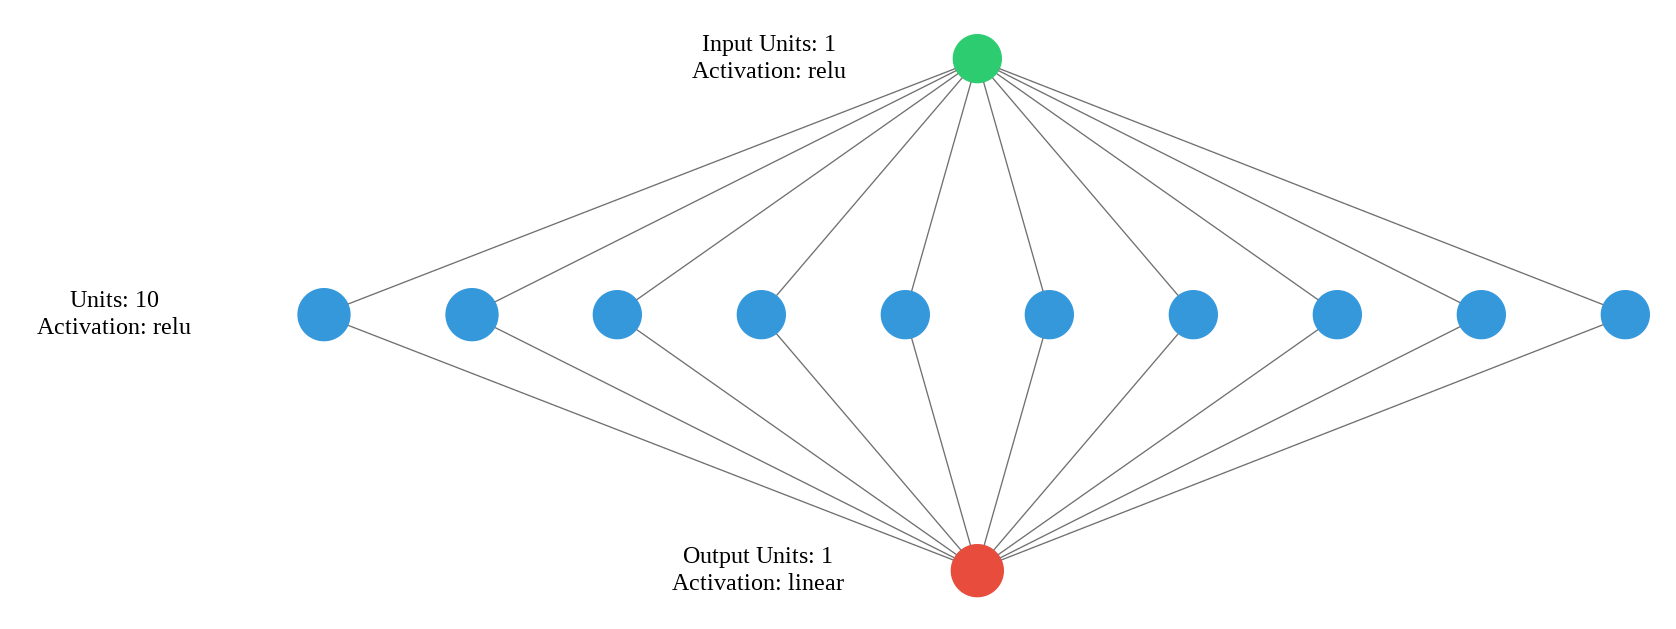

In [ ]:
from IPython.display import Image, display

display(Image('mygraph.png'))

In [ ]:
# compile the model

# set the optimizer, lossfn, metric

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
    )

In [ ]:
# train the model
# train_size = 80/20 = 4 iterations to complete one full dataset
history = model.fit(
    x_train,y_train,
    epochs = 100, # full dataset execution
    batch_size=20, # no.of samples to capture at a time
    validation_data=(x_val,y_val),
    verbose=1 # to print the progress of the training
)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 83.7781 - mse: 83.7781 - val_loss: 322.8054 - val_mse: 322.8054
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 81.5993 - mse: 81.5993 - val_loss: 312.9435 - val_mse: 312.9435
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 80.9416 - mse: 80.9416 - val_loss: 303.2270 - val_mse: 303.2270
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 74.8446 - mse: 74.8446 - val_loss: 293.7209 - val_mse: 293.7209
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 76.7051 - mse: 76.7051 - val_loss: 285.6500 - val_mse: 285.6500
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 77.8695 - mse: 77.8695 - val_loss: 277.7436 - val_mse: 277.7436
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 70.5054 - mse: 70.5054 - val_loss: 269.9877 - val_mse: 269.9877
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 68.2069 - mse: 68.2069 - val_loss: 262.3726 - val_mse: 262.3726
Epoch 9/100
4/4 ━━━━━━━━

Text(0, 0.5, 'loss')

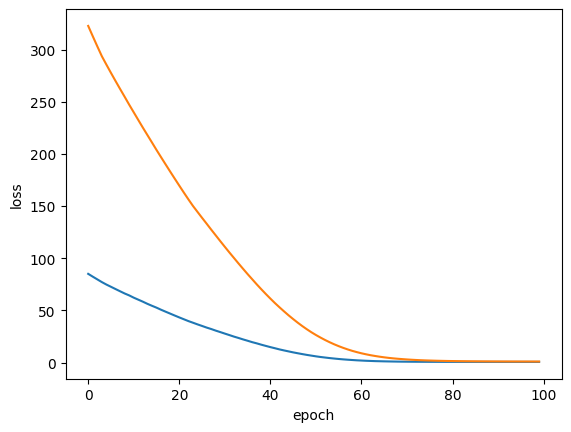

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train Loss')
plt.plot(history.history['val_loss'], label='val Loss')

plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
df.tail(1)

,x,y
99,10.0,19.8827


In [ ]:
model.predict(np.array([[10.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[18.85561]], dtype=float32)